<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in City of Toronto, Canada</font></h1>
<h2 align=center><font size = 5>Applied Data Science Capstone</font></h2>

In [1]:
# importing the necessary libraries
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

### Scrapping and Transforming the Data from Wikipedia

In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page=urllib.request.urlopen(url)
soup= BeautifulSoup(page,"lxml")
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
df=pd.DataFrame(A, columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df=df[~df.Borough.str.contains("Not assigned")]
df['Neighborhood'] = df['Neighborhood'].astype(str)
dr = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].agg( ','.join).reset_index()
dr['Neighborhood']=dr['Neighborhood'].astype(str).map(lambda x: x.rstrip('\n'))
dr['Neighborhood'][dr['Borough']=='Not assigned\n'] = dr['Borough']
dr['Postal Code']= dr['Postal Code'].astype(str).map(lambda x: x.rstrip('\n'))

In [3]:
!wget -O Geospatial_data.csv http://cocl.us/Geospatial_data
dx=pd.read_csv("Geospatial_data.csv")
dx.head()

--2020-06-29 10:11:06--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.48.113.194, 158.85.108.83, 158.85.108.86
Connecting to cocl.us (cocl.us)|169.48.113.194|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-06-29 10:11:07--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|169.48.113.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-06-29 10:11:08--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-06-29 10:11:08--  https://ibm.box.com/pu

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [4]:
result = pd.merge(dr,dx, how='left', on=['Postal Code', 'Postal Code'])
result.head()

Postal Code       Borough                            Neighborhood  \
0         M1B  Scarborough
                          Malvern, Rouge   
1         M1C  Scarborough
  Rouge Hill, Port Union, Highland Creek   
2         M1E  Scarborough
       Guildwood, Morningside, West Hill   
3         M1G  Scarborough
                                  Woburn   
4         M1H  Scarborough
                               Cedarbrae   

    Latitude  Longitude  
0  43.806686 -79.194353  
1  43.784535 -79.160497  
2  43.763573 -79.188711  
3  43.770992 -79.216917  
4  43.773136 -79.239476

### Defining Foursquare Credentials and Version
Looking for restaurants in 2 kilometer radius of each pincode location.

In [5]:
# The code was removed by Watson Studio for sharing.

restaurant......ok


In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
extract= requests.get(url).json()
# assign relevant part of JSON to venues
venues = extract['response']['venues']

# tranform venues into a dataframe
df1_test = json_normalize(venues)
dataframe=pd.DataFrame(columns=df1_test.columns)
df1={}
for i in range(len(result)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,result['Latitude'][i],result['Longitude'][i], VERSION, search_query, radius, LIMIT)
    extract= requests.get(url).json()
    venues = extract['response']['venues']
    df1[i] = json_normalize(venues)
    dataframe.append(df1[i])

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
compiled_dataframe=pd.DataFrame(columns=df1_test.columns)
for i in range(len(result)):
    compiled_dataframe=pd.concat([compiled_dataframe,df1[i]],axis=0)
    
compiled_dataframe=compiled_dataframe.reset_index(drop=True)
compiled_dataframe.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


categories hasPerk  \
0  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...   False   
1  [{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...   False   
2  [{'id': '4bf58dd8d48988d16c941735', 'name': 'B...   False   
3  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...   False   
4  [{'id': '4bf58dd8d48988d144941735', 'name': 'C...   False   

                         id      location.address location.cc  \
0  4be6c179d4f7c9b665042720  404 Old Kingston Rd.          CA   
1  4c97a82382b56dcbf7afebaa                   NaN          CA   
2  4b96cbe6f964a5202ae534e3      1265 Military Tr          CA   
3  51f2c1f8498edf6fd71b8e18                   NaN          CA   
4  5144fe0fe4b0634be203f271   5780 Sheppard Ave E          CA   

      location.city location.country location.crossStreet location.distance  \
0       Scarborough           Canada                  NaN              3194   
1  Toronto Division           Canada                  NaN              1636   
2           Toronto           Canada                  NaN              2485   
3               NaN           Canada                  NaN              3042   
4           Toronto           Canada           Markham Rd              3276   

                           location.formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 43.78446796744621...     43.784468   
1  [{'label': 'display', 'lat': 43.81958724358436...     43.819587   
2  [{'label': 'display', 'lat': 43.78500731279124...     43.785007   
3  [{'label': 'display', 'lat': 43.78047180175781...     43.780472   
4  [{'label': 'display', 'lat': 43.79554878818409...     43.795549   

   location.lng location.neighborhood location.postalCode location.state  \
0    -79.169200                   NaN                 NaN             ON   
1    -79.184574                   NaN                 NaN             ON   
2    -79.186964                   NaN                 NaN             ON   
3    -79.205078           Morningside                 NaN            NaN   
4    -79.232105                   NaN                 NaN             ON   

                   name    referralId venuePage.id  
0      Ted's Restaurant  v-1593425471          NaN  
1     Africa Restaurant  v-1593425471          NaN  
2  Rex's Den Restaurant  v-1593425471          NaN  
3  Grapevine Restaurant  v-1593425471          NaN  
4    Sabby's Restaurant  v-1593425471          NaN

In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in compiled_dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = compiled_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

name            categories               address  cc  \
0      Ted's Restaurant        Breakfast Spot  404 Old Kingston Rd.  CA   
1     Africa Restaurant     Food & Drink Shop                   NaN  CA   
2  Rex's Den Restaurant          Burger Joint      1265 Military Tr  CA   
3  Grapevine Restaurant            Restaurant                   NaN  CA   
4    Sabby's Restaurant  Caribbean Restaurant   5780 Sheppard Ave E  CA   

               city country crossStreet distance  \
0       Scarborough  Canada         NaN     3194   
1  Toronto Division  Canada         NaN     1636   
2           Toronto  Canada         NaN     2485   
3               NaN  Canada         NaN     3042   
4           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271

In [10]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [11]:
dataframe_filtered=dataframe_filtered[~dataframe_filtered['id'].apply(pd.Series).duplicated()]
dataframe_filtered = dataframe_filtered.reset_index()
dataframe_filtered.head()

index                  name            categories               address  \
0      0      Ted's Restaurant        Breakfast Spot  404 Old Kingston Rd.   
1      1     Africa Restaurant     Food & Drink Shop                   NaN   
2      2  Rex's Den Restaurant          Burger Joint      1265 Military Tr   
3      3  Grapevine Restaurant            Restaurant                   NaN   
4      4    Sabby's Restaurant  Caribbean Restaurant   5780 Sheppard Ave E   

   cc              city country crossStreet distance  \
0  CA       Scarborough  Canada         NaN     3194   
1  CA  Toronto Division  Canada         NaN     1636   
2  CA           Toronto  Canada         NaN     2485   
3  CA               NaN  Canada         NaN     3042   
4  CA           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271

### Plotting the Location of Restaurants

In [12]:
venues_map = folium.Map(location=[43.742778, -79.465556], zoom_start=12) # generate map centred around the Conrad Hotel


# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Count of Different Types of Restaurants

In [13]:
restaurant_counter=dataframe_filtered['categories'].value_counts()
restaurant_counter=restaurant_counter.reset_index()
restaurant_counter=restaurant_counter.rename(columns={"index": "categories", "categories": "count"})
restaurant_counter

categories  count
0                 Chinese Restaurant    140
1                         Restaurant    111
2               Caribbean Restaurant     46
3                  Korean Restaurant     39
4                   Asian Restaurant     36
5                  Indian Restaurant     36
6          Middle Eastern Restaurant     34
7                Japanese Restaurant     30
8                              Diner     27
9                 Italian Restaurant     23
10               American Restaurant     23
11                    Breakfast Spot     23
12             Vietnamese Restaurant     22
13                               Bar     20
14                African Restaurant     15
15                    Sandwich Place     15
16                   Thai Restaurant     14
17              Ethiopian Restaurant     12
18                  Sushi Restaurant     12
19                  Greek Restaurant     11
20       Eastern European Restaurant     11
21         Latin American Restaurant     10
22               Filipino Restaurant      9
23                Turkish Restaurant      7
24           New American Restaurant      7
25          Mediterranean Restaurant      6
26                        Steakhouse      6
27                 French Restaurant      6
28              Cantonese Restaurant      6
29                      Burger Joint      5
..                               ...    ...
80                English Restaurant      1
81   Southern / Soul Food Restaurant      1
82              Brazilian Restaurant      1
83                Mac & Cheese Joint      1
84                  Czech Restaurant      1
85                Tibetan Restaurant      1
86           South Indian Restaurant      1
87                     Grocery Store      1
88                  Iraqi Restaurant      1
89                          Wine Bar      1
90   Molecular Gastronomy Restaurant      1
91                       Other Event      1
92               Peruvian Restaurant      1
93                    Hardware Store      1
94                          Building      1
95                Persian Restaurant      1
96                            Bakery      1
97               Lebanese Restaurant      1
98                        Hookah Bar      1
99            Peking Duck Restaurant      1
100                        Juice Bar      1
101                         Vineyard      1
102            General Entertainment      1
103             Hungarian Restaurant      1
104              Moroccan Restaurant      1
105               Falafel Restaurant      1
106                      Wings Joint      1
107                Food & Drink Shop      1
108           Argentinian Restaurant      1
109                              Gym      1

[110 rows x 2 columns]

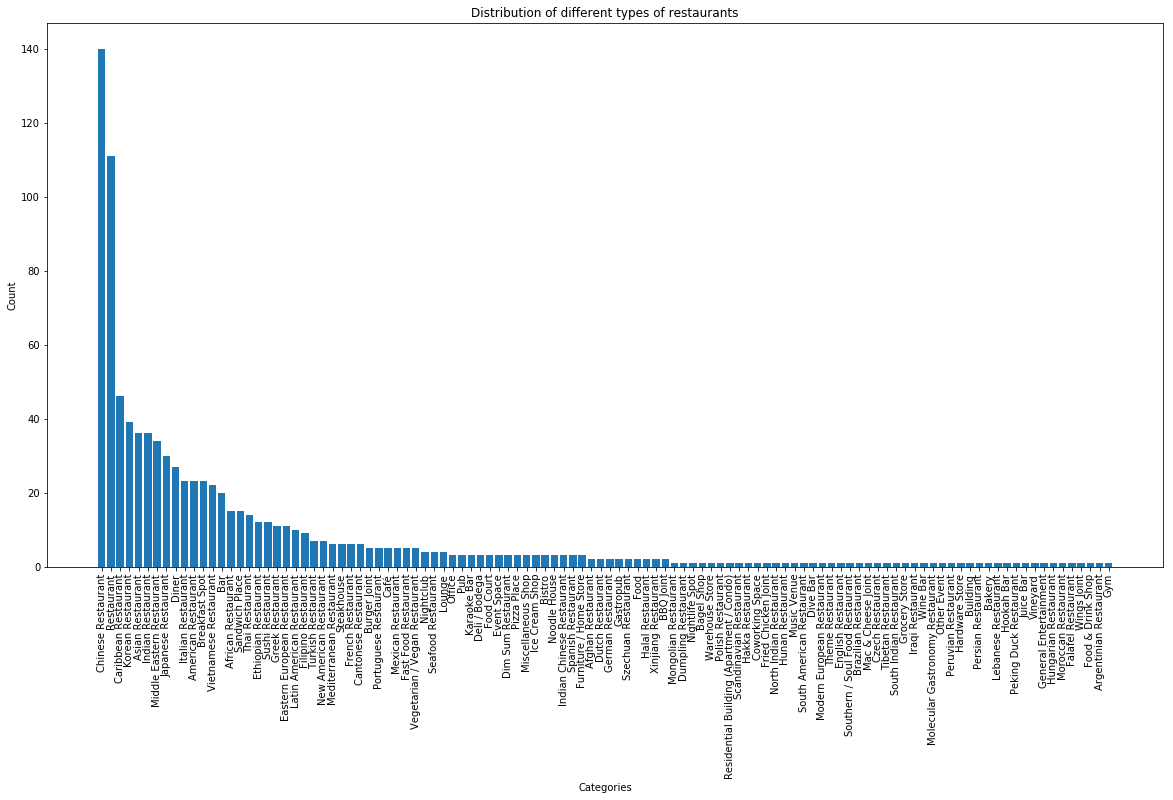

In [14]:
fig1 = plt.figure(figsize = (20,10)) 
  
# creating the bar plot 
plt.bar(list(restaurant_counter["categories"]),list(restaurant_counter["count"])) 
  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.title("Distribution of different types of restaurants")
plt.xticks(rotation=90)
plt.show() 


#### Q1. Let us say I have a client who is looking to set up a restaurant in Canada. I have to make a recommendation about which are the most commonly visited restaurants in Toronto.

#### A1. The most commonly visited restaurants in the neighborhoods around Toronto are: 
####                 1.  Chinese
####                 2.  Caribbean
####                 3.  Korean
####                 4. Indian
####                 5. MIddle Eastern

### Count of the Number of Restaurants in Each City

In [15]:
city_counter=dataframe_filtered['city'].value_counts()
city_counter=city_counter.reset_index()
city_counter=city_counter.dropna()
city_counter=city_counter.rename(columns={"index": "City", "city": "count"})
city_counter

City  count
0               Toronto    590
1           Scarborough     71
2           Mississauga     36
3            North York     33
4             Etobicoke     33
5               Markham     15
6               Vaughan     14
7            Woodbridge      9
8             Thornhill      8
9      Toronto Division      6
10            East York      5
11                 York      3
12              Concord      2
13              Rexdale      2
14               Torono      1
15          Scarboroigh      1
16       Weston Village      1
17              toronto      1
18              Niagara      1
19           Willowdale      1
20               Bolton      1
21               Dundas      1
22           Grand Case      1
23            Cambridge      1
24  Black Creek village      1
25          Port Credit      1
26              Oakvill      1
27              Vahalla      1
28        Richmond Hill      1
29               Vaughn      1
30             Edmonton      1

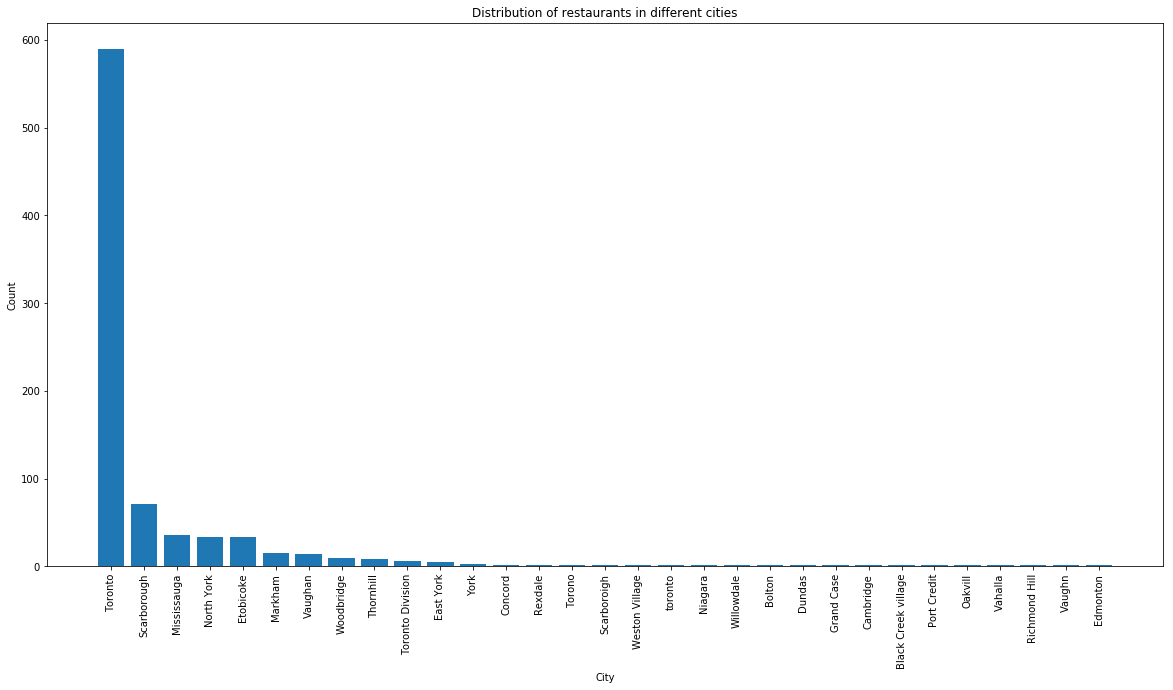

In [16]:
fig2 = plt.figure(figsize = (20,10)) 
  
# creating the bar plot 
plt.bar(list(city_counter["City"]),list(city_counter["count"])) 
  
plt.xlabel("City") 
plt.ylabel("Count") 
plt.title("Distribution of restaurants in different cities")
plt.xticks(rotation=90)
plt.show() 

In [17]:
group_data=dataframe_filtered.groupby(['categories','city']).count().reset_index()
group_data=group_data[['categories','city','name']]
group_data=group_data.rename(columns={'name':'count'})
group_data

categories              city  count
0                  Afghan Restaurant        North York      1
1                  Afghan Restaurant           Toronto      1
2                 African Restaurant         Etobicoke      2
3                 African Restaurant           Toronto      8
4                 African Restaurant    Weston Village      1
5                American Restaurant         Etobicoke      1
6                American Restaurant       Mississauga      3
7                American Restaurant       Scarborough      1
8                American Restaurant           Toronto     13
9             Argentinian Restaurant           Toronto      1
10                  Asian Restaurant         Etobicoke      1
11                  Asian Restaurant           Markham      1
12                  Asian Restaurant       Mississauga      1
13                  Asian Restaurant       Scarborough      4
14                  Asian Restaurant           Toronto     22
15                         BBQ Joint           Toronto      2
16                        Bagel Shop        North York      1
17                            Bakery           Toronto      1
18                               Bar       Mississauga      1
19                               Bar        North York      2
20                               Bar       Scarborough      1
21                               Bar           Toronto     12
22                            Bistro           Toronto      3
23              Brazilian Restaurant           Toronto      1
24                    Breakfast Spot         Etobicoke      2
25                    Breakfast Spot       Mississauga      1
26                    Breakfast Spot       Scarborough      1
27                    Breakfast Spot           Toronto     15
28                    Breakfast Spot           Vaughan      1
29                          Building           Toronto      1
..                               ...               ...    ...
201          South Indian Restaurant  Toronto Division      1
202  Southern / Soul Food Restaurant           Toronto      1
203               Spanish Restaurant           Toronto      3
204                       Steakhouse       Mississauga      2
205                       Steakhouse         Thornhill      1
206                       Steakhouse           Toronto      2
207                       Steakhouse        Woodbridge      1
208                 Sushi Restaurant         Etobicoke      2
209                 Sushi Restaurant           Toronto     10
210              Szechuan Restaurant        North York      1
211              Szechuan Restaurant           Toronto      1
212                  Thai Restaurant           Concord      1
213                  Thai Restaurant         Etobicoke      1
214                  Thai Restaurant           Toronto     10
215                  Thai Restaurant  Toronto Division      1
216                 Theme Restaurant           Toronto      1
217               Tibetan Restaurant           Toronto      1
218               Turkish Restaurant       Mississauga      1
219               Turkish Restaurant           Toronto      6
220    Vegetarian / Vegan Restaurant       Scarborough      1
221    Vegetarian / Vegan Restaurant           Toronto      3
222            Vietnamese Restaurant       Mississauga      2
223            Vietnamese Restaurant       Scarborough      2
224            Vietnamese Restaurant           Toronto     14
225                         Vineyard           Toronto      1
226                  Warehouse Store           Toronto      1
227                         Wine Bar           Toronto      1
228                      Wings Joint        North York      1
229              Xinjiang Restaurant           Markham      1
230              Xinjiang Restaurant       Mississauga      1

[231 rows x 3 columns]

In [18]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(dataframe_filtered['categories'].astype(str))))])

In [19]:
connect=pd.DataFrame.from_dict(d, orient='index').reset_index().rename(columns={"index":"categories",0:"num"})
dataframe_filtered = pd.merge(dataframe_filtered,connect, how='left', on=['categories', 'categories'])
dataframe_filtered['num']=dataframe_filtered['num'].fillna(77)
dataframe_filtered

index                                             name  \
0        0                                 Ted's Restaurant   
1        1                                Africa Restaurant   
2        2                             Rex's Den Restaurant   
3        3                             Grapevine Restaurant   
4        4                               Sabby's Restaurant   
5        5                                          Wendy’s   
6        8                         Peking Garden Restaurant   
7        9                                 Mahar Restaurant   
8       10                 Wonder Season Chinese Restaurant   
9       11                                       McDonald's   
10      15                        Little Bavaria Restaurant   
11      16                               Tai Chi Restaurant   
12      19                       Sunny's Bar and Restaurant   
13      21                                Prague Restaurant   
14      23                 Spice It Up Caribbean Restaurant   
15      24           Ali Baba's Restaurant @ Cedarbrae Mall   
16      25                         Sa-Fire Restaurant & Bar   
17      26                                 Max's Restaurant   
18      27                                      Lucky Hakka   
19      28                         Woburn Garden Restaurant   
20      29                                           Subway   
21      30                                           Subway   
22      33                        Sammy's Family Restaurant   
23      42                               terry's restaurant   
24      43                         Terry's Restaurant & Bar   
25      44                               Terry's Restaurant   
26      46                               Bendale Restaurant   
27      47                        The Local Cafe Restaurant   
28      49                  Windies Restaurant & Sports Bar   
29      50                              Federick Restaurant   
..     ...                                              ...   
930   3645                            Quatrefoil Restaurant   
931   3651                                            Ginko   
932   3652                             Tucker's Marketplace   
933   3653                            Shanghai's restaurant   
934   3654                        Dallas Restaurant And Bar   
935   3655                                Honest Restaurant   
936   3657                      24Seven Lounge & Restaurant   
937   3658                     24 Seven Lounge & Restaurant   
938   3667                             Favorites Restaurant   
939   3669                     Sunrise Caribbean Restaurant   
940   3671                                 Bilal Restaurant   
941   3672                                 Bilal Restaurant   
942   3673                   Spotlight caribbean restaurant   
943   3677                                  Mandarin Buffet   
944   3679              Caribbean Oasis Lounge & Restaurant   
945   3685  Bliss Restaurant & Bar - Hilton Airport Toronto   
946   3686     Fairfield Inn & Suites restaurant and lounge   
947   3687                           Bliss Restaurant & Bar   
948   3690                      The Metropolitan Restaurant   
949   3697                               Fifty's restaurant   
950   3698    Fuzion Restaurant (Grill-Steakhouse-Tandoori)   
951   3699                              PizzaWay Restaurant   
952   3700                    Falls Manor Family Restaurant   
953   3702                               Simma's Restaurant   
954   3703        Sky's The Limit - Lolo's Bar & Restaurant   
955   3704                The Local Restaurant And Wine Bar   
956   3707                                     Meteor Diner   
957   3708                                 Zet's Restaurant   
958   3710             Topiary's Steak & Seafood Restaurant   
959   3711                                            Corso   

                    categories                             address  cc  \
0               Breakfas

### Location Plot of Restaurant Types

In [20]:
venues_map1 = folium.Map(location=[43.742778, -79.465556], zoom_start=12) 
d_len=len(d)
x = np.arange(d_len)
ys = [i + x + (i*x)**2 for i in range(d_len)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors=[]
for name,categories,lat, lng, numt in zip(dataframe_filtered.name,dataframe_filtered.categories,dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.num.astype(int)):
    label = folium.Popup( str(name) + ' |  Category :' + str(categories), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[numt-1],
        fill = True,
        fill_color=rainbow[numt-1],
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

In [21]:
from sklearn.cluster import KMeans
# import warnings filter
import warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [22]:
points=[[0]*2]*len(dataframe_filtered) 
for i in range(len(dataframe_filtered)):
    points[i][0]=float(dataframe_filtered['lat'][i])
    points[i][1]=float(dataframe_filtered['lng'][i])

In [23]:
X=dataframe_filtered[['lat','lng']]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [24]:
kclusters = 20
restaurant_clustering1 =dataframe_filtered[['lat','lng']]
kmeans5 = KMeans(n_clusters=kclusters, random_state=0).fit(X)
kmeans5.labels_[0:10]

array([10,  1,  1,  1,  1,  1, 10, 10, 10, 10], dtype=int32)

In [25]:
dataframe_filtered.insert(0, 'ClusterLabels', kmeans5.labels_)
dataframe_filtered.head()

ClusterLabels  index                  name            categories  \
0             10      0      Ted's Restaurant        Breakfast Spot   
1              1      1     Africa Restaurant     Food & Drink Shop   
2              1      2  Rex's Den Restaurant          Burger Joint   
3              1      3  Grapevine Restaurant            Restaurant   
4              1      4    Sabby's Restaurant  Caribbean Restaurant   

                address  cc              city country crossStreet distance  \
0  404 Old Kingston Rd.  CA       Scarborough  Canada         NaN     3194   
1                   NaN  CA  Toronto Division  Canada         NaN     1636   
2      1265 Military Tr  CA           Toronto  Canada         NaN     2485   
3                   NaN  CA               NaN  Canada         NaN     3042   
4   5780 Sheppard Ave E  CA           Toronto  Canada  Markham Rd     3276   

                                    formattedAddress  \
0     [404 Old Kingston Rd., Scarborough ON, Canada]   
1                      [Toronto Division ON, Canada]   
2             [1265 Military Tr, Toronto ON, Canada]   
3                                           [Canada]   
4  [5780 Sheppard Ave E (Markham Rd), Toronto ON,...   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.78446796744621...  43.784468 -79.169200   
1  [{'label': 'display', 'lat': 43.81958724358436...  43.819587 -79.184574   
2  [{'label': 'display', 'lat': 43.78500731279124...  43.785007 -79.186964   
3  [{'label': 'display', 'lat': 43.78047180175781...  43.780472 -79.205078   
4  [{'label': 'display', 'lat': 43.79554878818409...  43.795549 -79.232105   

  neighborhood postalCode state                        id   num  
0          NaN        NaN    ON  4be6c179d4f7c9b665042720  12.0  
1          NaN        NaN    ON  4c97a82382b56dcbf7afebaa  35.0  
2          NaN        NaN    ON  4b96cbe6f964a5202ae534e3  14.0  
3  Morningside        NaN   NaN  51f2c1f8498edf6fd71b8e18  90.0  
4          NaN        NaN    ON  5144fe0fe4b0634be203f271  17.0

### Clustering Restaurants in the Neighborhood based on Proximity

In [26]:
venues_map2 = folium.Map(location=[43.742778, -79.465556], zoom_start=12) 

x1 = np.arange(kclusters)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]
markers_colors=[]
for name,cluster,categories,lat, lng, numt in zip(dataframe_filtered.name,dataframe_filtered.ClusterLabels,dataframe_filtered.categories,dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.num.astype(int)):
    label = folium.Popup( str(name) + ' |  Category :' + str(categories) + ' | Cluster :'+ str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color=rainbow1[cluster-1],
        fill=True,
        fill_color=rainbow1[cluster-1],
        fill_opacity=0.7).add_to(venues_map2)

# display map
venues_map2


In [27]:
groupings=dataframe_filtered.groupby(['categories','city']).count().sort_values(by='country',ascending=False).reset_index()
groupings=groupings.rename(columns={"name": "count"})
groupings=groupings[['categories','city','count']]
groupings

categories                 city  count
0           Chinese Restaurant              Toronto     84
1                   Restaurant              Toronto     61
2         Caribbean Restaurant              Toronto     25
3            Indian Restaurant              Toronto     23
4             Asian Restaurant              Toronto     22
5          Japanese Restaurant              Toronto     22
6           Chinese Restaurant          Scarborough     21
7    Middle Eastern Restaurant              Toronto     21
8            Korean Restaurant              Toronto     20
9                        Diner              Toronto     19
10          Italian Restaurant              Toronto     16
11              Breakfast Spot              Toronto     15
12       Vietnamese Restaurant              Toronto     14
13         American Restaurant              Toronto     13
14                         Bar              Toronto     12
15              Sandwich Place              Toronto     11
16            Sushi Restaurant              Toronto     10
17             Thai Restaurant              Toronto     10
18            Greek Restaurant              Toronto     10
19   Latin American Restaurant              Toronto      9
20                  Restaurant          Scarborough      9
21        Ethiopian Restaurant              Toronto      9
22                  Restaurant           North York      8
23          African Restaurant              Toronto      8
24          Chinese Restaurant              Markham      6
25           French Restaurant              Toronto      6
26          Turkish Restaurant              Toronto      6
27     New American Restaurant              Toronto      5
28        Caribbean Restaurant          Scarborough      5
29                Burger Joint              Toronto      5
..                         ...                  ...    ...
201         Italian Restaurant           Woodbridge      1
202        Japanese Restaurant            Etobicoke      1
203        Japanese Restaurant              Markham      1
204        Japanese Restaurant          Scarborough      1
205        Japanese Restaurant           Willowdale      1
206                  Juice Bar              Toronto      1
207                Karaoke Bar           Woodbridge      1
208        Lebanese Restaurant              Toronto      1
209           Hunan Restaurant              Toronto      1
210           Hakka Restaurant          Scarborough      1
211       Ethiopian Restaurant              toronto      1
212                        Gym           North York      1
213                Event Space              Markham      1
214                Event Space            Thornhill      1
215                Event Space              Toronto      1
216         Falafel Restaurant              Toronto      1
217       Fast Food Restaurant            Etobicoke      1
218       Fast Food Restaurant              Toronto      1
219          Food & Drink Shop     Toronto Division      1
220                 Food Court            Etobicoke      1
221                 Food Court              Vaughan      1
222        Fried Chicken Joint          Scarborough      1
223     Furniture / Home Store          Scarborough      1
224                  Gastropub  Black Creek village      1
225      General Entertainment              Toronto      1
226          German Restaurant          Scarborough      1
227          German Restaurant              Toronto      1
228           Greek Restaurant          Mississauga      1
229              Grocery Store              Toronto      1
230        Xinjiang Restaurant          Mississauga      1

[231 rows x 3 columns]

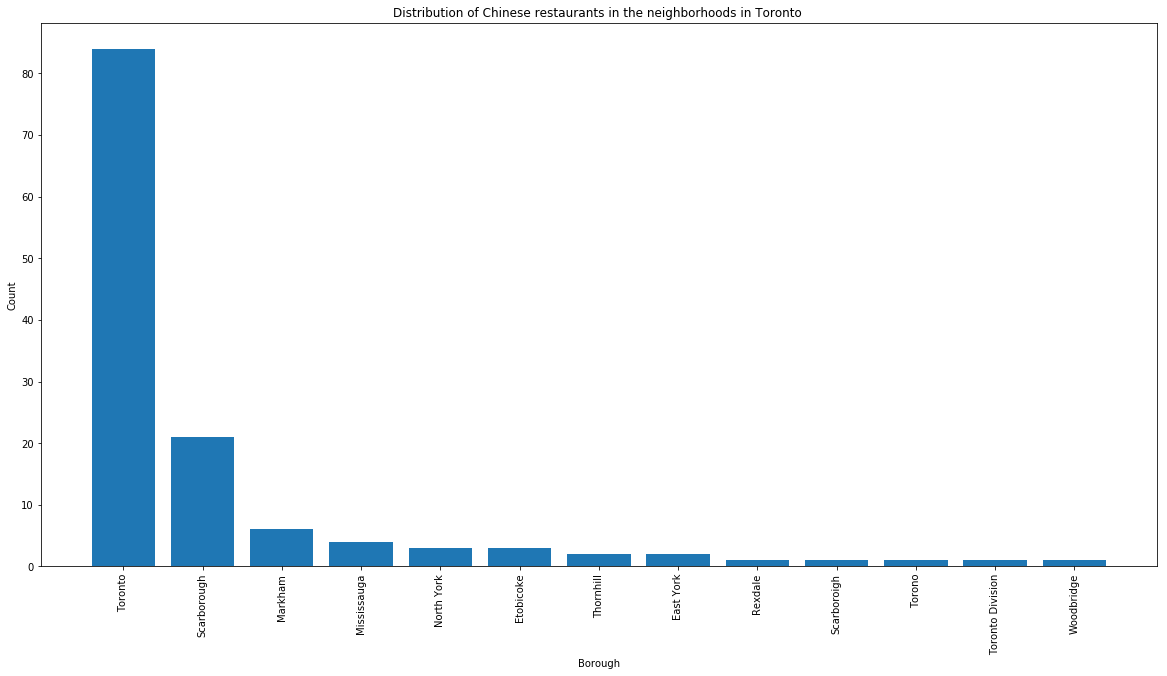

In [28]:
fig3 = plt.figure(figsize = (20,10)) 
  
# creating the bar plot 
plt.bar(list(groupings["city"][groupings["categories"]=="Chinese Restaurant"]),list(groupings["count"][groupings["categories"]=="Chinese Restaurant"])) 
  
plt.xlabel("Borough") 
plt.ylabel("Count") 
plt.title("Distribution of Chinese restaurants in the neighborhoods in Toronto ")
plt.xticks(rotation=90)
plt.show() 

#### Q2. Now the client is planning to set up a chain of 20 Chinese restaurants in and around Toronto. So, I have to make a recommendation about the location of these restaurants so that they don't cannibalise each other.

In [29]:
df_toronto=dataframe_filtered[dataframe_filtered['categories']=='Chinese Restaurant']
df_toronto_chinese=df_toronto[['name','lat','lng']].reset_index()
df_toronto_chinese

index                                        name        lat        lng
0        6                    Peking Garden Restaurant  43.771946 -79.185976
1       11                          Tai Chi Restaurant  43.759544 -79.198180
2       18                                 Lucky Hakka  43.762470 -79.214164
3       39         Best Friends Chinese Restaurant 會賓樓  43.791806 -79.250197
4       40         Old Neighbour Restaurant 老街坊天津韩记包子铺  43.787078 -79.275454
5       41           Perfect Chinese Restaurant 雅瓊海鮮酒家  43.787774 -79.270294
6       43   South Sea Fish Village Chinese Restaurant  43.786210 -79.275701
7       44                Beef Noodle Restaurant 老李牛肉麵  43.785937 -79.276031
8       47                Yuan Yuan Chinese Restaurant  43.791805 -79.250140
9       49  Fortune Dynasty Chinese Seafood Restaurant  43.791607 -79.250277
10      53                          Timehri Restaurant  43.788219 -79.264069
11      54      SINIPINO Chinese Restaurant & Take Out  43.792046 -79.249712
12      55            Royal Chinese Seafood Restaurant  43.798496 -79.262196
13      71                Good Luck Chinese Restaurant  43.733297 -79.266668
14      72                       Super Choy Restaurant  43.721289 -79.236698
15      73                      Lin Chinese Restaurant  43.735107 -79.276122
16      75             Lucky Chinese (Haka) Restaurant  43.752465 -79.265311
17      76                          Kim Kim restaurant  43.753833 -79.276611
18      78                   Southern China Restaurant  43.715321 -79.261014
19      97                       Golden Wok Restaurant  43.700601 -79.297343
20     107          Wing Wings chinese food restaurant  43.690897 -79.290089
21     110                 Kingston Chinese Restaurant  43.682120 -79.285980
22     117                        Honey Bee Restaurant  43.670409 -79.298406
23     120                   Wok Wok Restaurant 恒記粥麵小廚  43.784139 -79.288287
24     121          The Royal Chinese Restaurant 避風塘小炒  43.780505 -79.298844
25     124            Very Fair Chinese Restaurant 同德樓  43.783670 -79.287679
26     125      Chopsticks SzeChuan Chinese Restaurant  43.767514 -79.270631
27     132             Golden House Chinese Restaurant  43.760553 -79.301950
28     136     Golden Seven Chinese Cuisine Restaurant  43.776555 -79.306638
29     137                      Super Hakka Restaurant  43.742892 -79.304949
..     ...                                         ...        ...        ...
110    608          North-East Chinese Restaurant 華北美食  43.653185 -79.396677
111    612                    New Sky Restaurant 小沙田食家  43.655337 -79.398897
112    620                        Fireplace Restaurant  43.663825 -79.377026
113    633                     Swatow Restaurant 汕頭小食家  43.653866 -79.398334
114    649                Good View Chinese Restaurant  43.656791 -79.376139
115    670               Hong Shing Chinese Restaurant  43.654925 -79.387089
116    672                            Zhu's Restaurant  43.656277 -79.392393
117    673                 The Winding Road Restaurant  43.656013 -79.392451
118    675                Yueh Tung Chinese Restaurant  43.655281 -79.385337
119    687                Excellent Chinese Restaurant  43.639240 -79.392278
120    705                        River Tai Restaurant  43.662902 -79.403167
121    709   Yoo J Express Restaurant (Purple Place! )  43.652564 -79.398903
122    710                  Sang Ho Seafood Restaurant  43.652747 -79.399021
123    712                         Rong Hua Restaurant  43.653144 -79.397133
124    715                  Harmony Chinese Restaurant  43.653427 -79.397030
125    723                  Good Life House Restaurant  43.641052 -79.434535
126    737                    Oriental City Restaurant  43.690984 -79.471979
127    754             Green Island Chinese Restaurant  43.682164 -79.471603
128    790                          Nanjing Restaurant  43.648471 -79.431068
129    817                                China Island  43.656114 -79.453776
1

In [30]:
points1=[[0]*2]*len(df_toronto_chinese) 
for i in range(len(df_toronto_chinese)):
    points1[i][0]=float(df_toronto_chinese['lat'][i])
    points1[i][1]=float(df_toronto_chinese['lng'][i])

In [31]:
X1=df_toronto_chinese[['lat','lng']]
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))

In [32]:
kclusters11 = 20
restaurant_clustering11 =df_toronto_chinese[['lat','lng']]
kmeans11 = KMeans(n_clusters=kclusters11, random_state=0).fit(X1)
kmeans11.labels_[0:10]

array([13, 13, 13, 18, 18, 18, 18, 18, 18, 18], dtype=int32)

In [33]:
df_toronto_chinese.insert(0, 'ClusterLabels', kmeans11.labels_)
df_toronto_chinese.head()

ClusterLabels  index                                 name        lat  \
0             13      6             Peking Garden Restaurant  43.771946   
1             13     11                   Tai Chi Restaurant  43.759544   
2             13     18                          Lucky Hakka  43.762470   
3             18     39  Best Friends Chinese Restaurant 會賓樓  43.791806   
4             18     40  Old Neighbour Restaurant 老街坊天津韩记包子铺  43.787078   

         lng  
0 -79.185976  
1 -79.198180  
2 -79.214164  
3 -79.250197  
4 -79.275454

In [34]:
df_toronto_chinese

ClusterLabels  index                                        name  \
0               13      6                    Peking Garden Restaurant   
1               13     11                          Tai Chi Restaurant   
2               13     18                                 Lucky Hakka   
3               18     39         Best Friends Chinese Restaurant 會賓樓   
4               18     40         Old Neighbour Restaurant 老街坊天津韩记包子铺   
5               18     41           Perfect Chinese Restaurant 雅瓊海鮮酒家   
6               18     43   South Sea Fish Village Chinese Restaurant   
7               18     44                Beef Noodle Restaurant 老李牛肉麵   
8               18     47                Yuan Yuan Chinese Restaurant   
9               18     49  Fortune Dynasty Chinese Seafood Restaurant   
10              18     53                          Timehri Restaurant   
11              18     54      SINIPINO Chinese Restaurant & Take Out   
12              18     55            Royal Chinese Seafood Restaurant   
13               7     71                Good Luck Chinese Restaurant   
14               7     72                       Super Choy Restaurant   
15               7     73                      Lin Chinese Restaurant   
16               7     75             Lucky Chinese (Haka) Restaurant   
17               1     76                          Kim Kim restaurant   
18               7     78                   Southern China Restaurant   
19              19     97                       Golden Wok Restaurant   
20              19    107          Wing Wings chinese food restaurant   
21              19    110                 Kingston Chinese Restaurant   
22              19    117                        Honey Bee Restaurant   
23               1    120                   Wok Wok Restaurant 恒記粥麵小廚   
24               1    121          The Royal Chinese Restaurant 避風塘小炒   
25               1    124            Very Fair Chinese Restaurant 同德樓   
26               1    125      Chopsticks SzeChuan Chinese Restaurant   
27               1    132             Golden House Chinese Restaurant   
28               1    136     Golden Seven Chinese Cuisine Restaurant   
29               1    137                      Super Hakka Restaurant   
..             ...    ...                                         ...   
110              9    608          North-East Chinese Restaurant 華北美食   
111              9    612                    New Sky Restaurant 小沙田食家   
112              9    620                        Fireplace Restaurant   
113              9    633                     Swatow Restaurant 汕頭小食家   
114              9    649                Good View Chinese Restaurant   
115              9    670               Hong Shing Chinese Restaurant   
116              9    672                            Zhu's Restaurant   
117              9    673                 The Winding Road Restaurant   
118              9    675                Yueh Tung Chinese Restaurant   
119              9    687                Excellent Chinese Restaurant   
120              9    705                        River Tai Restaurant   
121              9    709   Yoo J Express Restaurant (Purple Place! )   
122              9    710                  Sang Ho Seafood Restaurant   
123              9    712                         Rong Hua Restaurant   
124              9    715                  Harmony Chinese Restaurant   
125              9    723                  Good Life House Restaurant   
126              0    737                    Oriental City Restaurant   
127              0    754             Green Island Chinese Restaurant   
128              9    790                          Nanjing Restaurant   
129              0    817                                China Island   
130             10    836                    Ancom Chinese Restaurant   
131              6    838                      Dynasty BBQ restaurant   
132              6    849      Wing Sun Coffee and Chinese Rest

In [35]:
venues_map3 = folium.Map(location=[43.641052, -79.434535], zoom_start=12) 

x1 = np.arange(kclusters11)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters11)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]
markers_colors=[]
for name,cluster,lat, lng in zip(df_toronto_chinese.name,df_toronto_chinese.ClusterLabels,df_toronto_chinese.lat, df_toronto_chinese.lng):
    label = folium.Popup( str(name) + ' | Cluster :'+ str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color=rainbow1[cluster-1],
        fill=True,
        fill_color=rainbow1[cluster-1],
        fill_opacity=0.7).add_to(venues_map3)

# display map
venues_map3

#### A2. Choosing the Chinese Restaurants from the 20 different clusters as in the above map will reduce chances of cannibalisation amongst the restaurants belonging to the chain.

                                                                   *** THE END ***